# Import and view the data

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sps

path = 'C:/Users/Utente/Desktop/RecSys_Course_AT_PoliMi-master'
path1 = path + '/interactions_and_impressions.csv'
path2 = path + '/data_ICM_length.csv'
path3 = path + '/data_ICM_type.csv'




URM_interactions = pd.read_csv(path1)
ICM_length = pd.read_csv(path2)
ICM_type = pd.read_csv(path3)


C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\424308967.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  URM_interactions = pd.read_csv(path1)


In [2]:
##IMPRESSION DISCOUNTING

dummy = URM_interactions.copy()
dummy = dummy[dummy["Data"] == 0]
#Impressions is a string of numbers seperated by ",". So I am using str.split to convert them into a list of numbers(ItemIDs)
dummy["Impressions"] = dummy["Impressions"].str.split(",")

#Filling the NaN values with a dummy number that does not exist in ItemID list, these will be dropped later
dummy["Impressions"] = dummy["Impressions"].fillna(99999)

#Explode basicly explodes the list of Impressions, every number in the list is seperated intro independent rows with 
#corresponding UserID ItemID and Data
URM_impressions = dummy.explode(["Impressions"])
URM_impressions["UserID"] = URM_impressions["UserID"].astype(int)
URM_impressions["ItemID"] = URM_impressions["ItemID"].astype(int)
URM_impressions["Impressions"] = URM_impressions["Impressions"].astype(int)
#Dropping the NaN values, we assigned them to dummy numbers otherwise explode does not work 
URM_impressions = URM_impressions.drop(URM_impressions[URM_impressions["Impressions"] == 99999].index)

#Dropping the itemID = Impression, meaning the item user interacted amongst the impression list
URM_impressions = URM_impressions[URM_impressions["ItemID"] != URM_impressions["Impressions"]]

#Now every impression is a seperate itemID that I can assign ratings. So I am selecting those columns and renaming Impressions
#as my new ItemID
URM_impressions = URM_impressions[["UserID","Impressions","Data"]]
URM_impressions.rename(columns = {'Impressions':'ItemID'}, inplace = True)

#I assign every Impression a rating of -1, meaning if the user did not interacted with the item, user did not like it
URM_impressions["Data"] = -1
URM_impressions["UserID"] = URM_impressions["UserID"].astype(int)
URM_impressions["ItemID"] = URM_impressions["ItemID"].astype(int)

URM_impressions

,UserID,ItemID,Data
3,0,20,-1
3,0,22,-1
3,0,23,-1
3,0,24,-1
3,0,25,-1
...,...,...,...
5443853,36018,1675,-1
5443853,36018,2341,-1
5443853,36018,361,-1
5443853,36018,1300,-1


In [3]:
"""interactions_and_impressions.csv : Contains the training set, describing implicit preferences expressed by the users.
-user_id : identifier of the user
-item_id : identifier of the item (TV series)
-impression_list : string containing the items that were present on the screen when the user interacted with the 
 item in column item_id. Not all interactions have a corresponding impressions list.
-data : "0" if the user watched the item, "1" if the user opened the item details page."""

URM_interactions

,UserID,ItemID,Impressions,Data
0,0,11,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1
1,0,21,NaN,0
2,0,21,NaN,0
3,0,21,"20,21,22,23,24,25,26,27,28,29",0
4,0,21,NaN,1
...,...,...,...,...
5826501,41628,20448,NaN,0
5826502,41628,20896,NaN,1
5826503,41628,21506,NaN,1
5826504,41628,22882,NaN,0


In [4]:
URM_interactions.describe()

,UserID,ItemID,Data
count,5.826506e+06,5.826506e+06,5.826506e+06
mean,1.899451e+04,4.641730e+03,3.877156e-01
std,1.117126e+04,6.533349e+03,4.872291e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.315000e+03,3.370000e+02,0.000000e+00
50%,1.893600e+04,1.448000e+03,0.000000e+00
75%,2.831300e+04,6.016000e+03,1.000000e+00
max,4.162800e+04,2.450600e+04,1.000000e+00


In [5]:
URM_interactions = URM_interactions[["UserID","ItemID","Data"]]

watched = 1;
open_descr = 0.5;
URM_interactions['Data'][URM_interactions['Data'] == 0] = 3
URM_interactions['Data'][URM_interactions['Data'] == 1] = open_descr # opened - interested
URM_interactions['Data'][URM_interactions['Data'] == 3] = watched # watched

C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\2015205061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URM_interactions['Data'][URM_interactions['Data'] == 0] = 3
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\2015205061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  URM_interactions['Data'][URM_interactions['Data'] == 1] = open_descr # opened - interested
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\2015205061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

<AxesSubplot:>

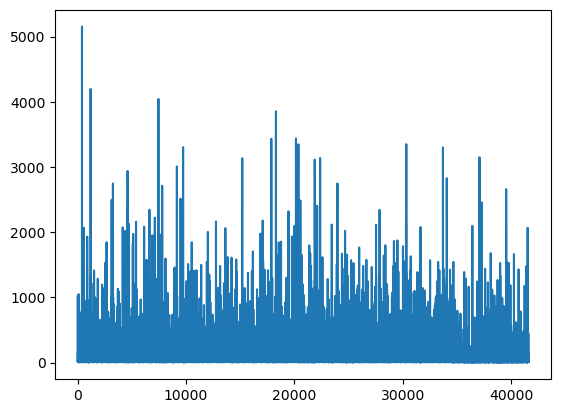

In [6]:
User_Episode = URM_interactions.copy()
User_Episode = User_Episode[["UserID","ItemID","Data"]][URM_interactions['Data'] == 1]
User_Episode["Data"] = User_Episode.groupby(["UserID","ItemID"])["ItemID"].transform("count")
User_Episode.rename(columns = {'Data':'Watched'}, inplace = True)
User_Episode = User_Episode.drop_duplicates(subset = ["UserID" , "ItemID"])
User_Episode = User_Episode.reset_index()

User_Interactions = User_Episode.copy()
User_Interactions["Watched"] = User_Interactions.groupby(["UserID","ItemID"])["Watched"].transform(sum)
User_Interactions = User_Interactions.reset_index()
User_Interactions = User_Interactions.drop_duplicates(subset = ["UserID" , "ItemID"])
User_Interactions = User_Interactions[["UserID","Watched"]]

User_Interactions["TotInteract"] = User_Interactions.groupby(["UserID"])["Watched"].transform(sum)
User_Interactions = User_Interactions.drop(columns = ["Watched"])
User_Interactions = User_Interactions.drop_duplicates(subset = ["UserID"])
User_Interactions = User_Interactions.reset_index()
User_Interactions = User_Interactions.drop(columns = ["index"])
User_Interactions["TotInteract"].plot()

In [7]:
User_Interactions[User_Interactions["TotInteract"]<5]

,UserID,TotInteract
97,97,4
1022,1022,3
1038,1038,4
1773,1773,4
2255,2255,4
...,...,...
40518,40518,4
40782,40782,3
40992,40992,3
41432,41432,4


In [9]:
Users_cold = User_Interactions.UserID[User_Interactions["TotInteract"]<5]
Users_cold

97          97
1022      1022
1038      1038
1773      1773
2255      2255
         ...  
40518    40518
40782    40782
40992    40992
41432    41432
41503    41503
Name: UserID, Length: 73, dtype: int64

In [10]:
URM_interactions

,UserID,ItemID,Data
0,0,11,0.5
1,0,21,1.0
2,0,21,1.0
3,0,21,1.0
4,0,21,0.5
...,...,...,...
5826501,41628,20448,1.0
5826502,41628,20896,0.5
5826503,41628,21506,0.5
5826504,41628,22882,1.0


In [10]:
#ICM_length[ICM_length["data"] == 10000]["data"] = 1000

In [11]:
User_Episode = URM_interactions.copy()
User_Episode = User_Episode[["UserID","ItemID","Data"]][URM_interactions['Data'] == watched]
User_Episode["Data"] = User_Episode.groupby(["UserID","ItemID"])["ItemID"].transform("count")
User_Episode.rename(columns = {'Data':'Watched'}, inplace = True)
User_Episode = User_Episode.drop_duplicates(subset = ["UserID" , "ItemID"])
User_Episode = User_Episode.reset_index()

ICM_length.rename(columns = {'item_id':'ItemID'}, inplace = True)

User_Episode = User_Episode.merge(ICM_length,on = "ItemID",how = "outer")
User_Episode = User_Episode.reset_index()
User_Episode = User_Episode.dropna(subset = ["Watched"])
User_Episode["data"] = User_Episode["data"].fillna(1.0)

User_Episode["Watched"]/=User_Episode["data"]

User_Episode["Watched"][User_Episode["Watched"] >= 0.5] = 1
User_Episode["Watched"][User_Episode["Watched"] < 0.5] = 0.5

User_Episode = User_Episode[["UserID", "ItemID","Watched"]]


User_Episode


C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\2251296506.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_Episode["Watched"][User_Episode["Watched"] >= 0.5] = 1
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\2251296506.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_Episode["Watched"][User_Episode["Watched"] < 0.5] = 0.5


,UserID,ItemID,Watched
0,0.0,21,0.5
1,14.0,21,0.5
2,15.0,21,0.5
3,16.0,21,0.5
4,25.0,21,0.5
...,...,...,...
1051823,31757.0,17054,1.0
1051824,32982.0,17054,1.0
1051825,35073.0,17054,1.0
1051826,38013.0,17054,1.0


In [12]:
URM_interactions = URM_interactions.merge(User_Episode,on = ["UserID","ItemID"] ,how = "outer")
URM_interactions["Watched"] = URM_interactions[["Watched"]].fillna(1.0)
URM_interactions["Data"]*=URM_interactions["Watched"]
URM_interactions = pd.concat([URM_interactions,URM_impressions])

URM_interactions = URM_interactions.groupby(["UserID","ItemID"])["Data"].mean()
URM_interactions = URM_interactions.reset_index()


URM_interactions

,UserID,ItemID,Data
0,0,11,0.500000
1,0,20,-1.000000
2,0,21,0.312500
3,0,22,0.323529
4,0,23,-1.000000
...,...,...,...
2381800,41628,20448,1.000000
2381801,41628,20896,0.500000
2381802,41628,21506,0.500000
2381803,41628,22882,0.500000


<AxesSubplot:>

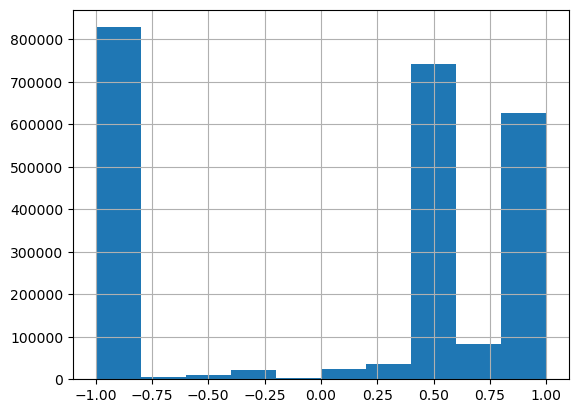

In [13]:
URM_interactions.Data.hist()

<AxesSubplot:xlabel='Data'>

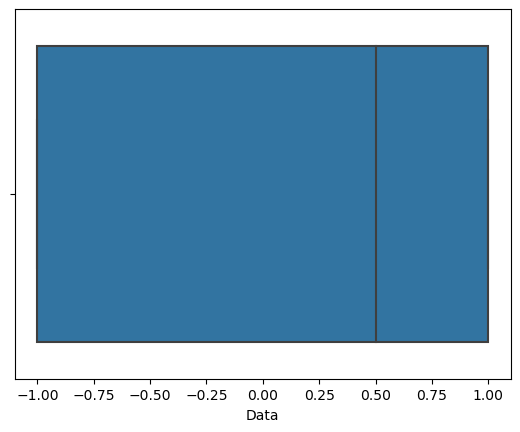

In [14]:
import seaborn as sns
sns.boxplot(x=URM_interactions["Data"])

In [15]:
ICM_length

,ItemID,feature_id,data
0,0,0,1
1,1,0,1
2,2,0,21
3,3,0,1
4,4,0,1
...,...,...,...
23086,27963,0,1
23087,27964,0,1
23088,27965,0,1
23089,27966,0,1


In [16]:
"""data_ICM_length.csv :
Contains the number of episodes of the items. TV series may have multiple episodes.

-item_id : identifier of the item
-feature_id : identifier of the feature, only one value (0) exists since this ICM only contains the feature "length"
-data : number of episodes. Some values may be 0 due to incomplete data."""
ICM_length.drop(columns = 'feature_id', inplace=True) # same feature is not needed
ICM_length 

,ItemID,data
0,0,1
1,1,1
2,2,21
3,3,1
4,4,1
...,...,...
23086,27963,1
23087,27964,1
23088,27965,1
23089,27966,1


In [17]:
ICM_length["data"] = ICM_length["data"].fillna(0)
ICM_length.loc[ICM_length["data"] > 1 , "data"] = 10 #movie
ICM_length.loc[ICM_length["data"] == 1 , "data"] = 11 #series
ICM_length = ICM_length.drop(ICM_length[ICM_length.data == 0].index)
ICM_length.rename(columns = {'data':'feature_id'}, inplace = True)
ICM_length

,ItemID,feature_id
0,0,11
1,1,11
2,2,10
3,3,11
4,4,11
...,...,...
23086,27963,11
23087,27964,11
23088,27965,11
23089,27966,11


In [18]:
ICM_length.describe()

,ItemID,feature_id
count,23091.000000,23091.000000
mean,14341.094452,10.569659
std,8236.943085,0.495135
min,0.000000,10.000000
25%,7169.000000,10.000000
50%,14405.000000,11.000000
75%,21646.500000,11.000000
max,27967.000000,11.000000


In [19]:
"""data_ICM_type.csv:
Contains the type of the items. An item can only have one type.
All types are anonymized and described only by a numerical identifier.

-item_id : identifier of the item
-feature_id : identifier of the type
-data : "1" if the item is described by the type"""
ICM_type.drop(columns = 'data', inplace=True) # same feature is not needed
ICM_type

,item_id,feature_id
0,0,1
1,1,3
2,2,4
3,3,1
4,4,3
...,...,...
23086,27963,1
23087,27964,2
23088,27965,1
23089,27966,1


In [20]:
#print ("The number of interactions is {}".format(len(URM_interactions)))
#print ("The number of users is {}".format(max(URM_interactions['UserID'])+1))
#print ("The number of items is {}".format(max(ICM_length['ItemID'])+1))
#print("Sparcity: {}%".format(1-len(int_and_impr)/(n_users*n_items)))

In [20]:
ICM_type.rename(columns = {'item_id':'ItemID'}, inplace = True)
#ICM_length.rename(columns = {'item_id':'ItemID'}, inplace = True)
#ICM_type = ICM_type.append(ICM_length, ignore_index=True)
ICM_type

,ItemID,feature_id
0,0,1
1,1,3
2,2,4
3,3,1
4,4,3
...,...,...
23086,27963,1
23087,27964,2
23088,27965,1
23089,27966,1


In [22]:
#ICM_type.rename(columns = {'data':'epNum'}, inplace = True)

In [21]:
ICM = URM_interactions.merge(ICM_type, on="ItemID", how="outer" )

ICM

,UserID,ItemID,Data,feature_id
0,0.0,11,0.5,1.0
1,143.0,11,-1.0,1.0
2,191.0,11,-1.0,1.0
3,531.0,11,-1.0,1.0
4,572.0,11,-1.0,1.0
...,...,...,...,...
2385261,NaN,27963,NaN,1.0
2385262,NaN,27964,NaN,2.0
2385263,NaN,27965,NaN,1.0
2385264,NaN,27966,NaN,1.0


In [22]:
ICM = ICM.dropna(subset=['UserID'])
ICM["feature_id"] = ICM["feature_id"].fillna(0)
ICM["UserID"] = ICM["UserID"].astype(int)
ICM["ItemID"] = ICM["ItemID"].astype(int)
ICM["feature_id"] = ICM["feature_id"].astype(int)
ICM

C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\3705772614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICM["feature_id"] = ICM["feature_id"].fillna(0)
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\3705772614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICM["UserID"] = ICM["UserID"].astype(int)
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\3705772614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,UserID,ItemID,Data,feature_id
0,0,11,0.5,1
1,143,11,-1.0,1
2,191,11,-1.0,1
3,531,11,-1.0,1
4,572,11,-1.0,1
...,...,...,...,...
2381800,32642,20177,0.5,1
2381801,35454,20177,0.5,1
2381802,39361,20177,0.5,1
2381803,41175,20177,0.5,1


In [25]:
#ICM["epNum"] = ICM["epNum"].fillna(0)
#ICM

In [23]:
mapped_id, original_id = pd.factorize(URM_interactions["UserID"].unique())

print("Unique UserID in the URM are {}".format(len(original_id)))

all_item_indices = pd.concat([URM_interactions["UserID"], ICM["UserID"],], ignore_index=True)
mapped_id, original_id = pd.factorize(all_item_indices.unique())

print("Unique UserID in the URM and ICM are {}".format(len(original_id)))

user_original_ID_to_index = pd.Series(mapped_id, index=original_id)

Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629


In [24]:
mapped_id, original_id = pd.factorize(URM_interactions["ItemID"].unique())

print("Unique ItemID in the URM are {}".format(len(original_id)))
all_item_indices = pd.concat([URM_interactions["ItemID"], ICM["ItemID"]], ignore_index=True)
mapped_id, original_id = pd.factorize(all_item_indices.unique())

print("Unique ItemID in the URM and ICM are {}".format(len(original_id)))

item_original_ID_to_index = pd.Series(mapped_id, index=original_id)

Unique ItemID in the URM are 24507
Unique ItemID in the URM and ICM are 24507


In [25]:
mapped_id, original_id = pd.factorize(URM_interactions["Data"].unique())
data_original_ID_to_index = pd.Series(mapped_id, index=original_id)

In [26]:
mapped_id, original_id = pd.factorize(ICM["feature_id"].unique())
feature_original_ID_to_index = pd.Series(mapped_id, index=original_id)

In [30]:
#mapped_id, original_id = pd.factorize(ICM["epNum"].unique())
#epNum_original_ID_to_index = pd.Series(mapped_id, index=original_id)

In [27]:
URM_interactions["ItemID"] = URM_interactions["ItemID"].map(item_original_ID_to_index)
URM_interactions["UserID"] = URM_interactions["UserID"].map(user_original_ID_to_index)
URM_interactions["Data"] = URM_interactions["Data"].map(data_original_ID_to_index)

In [28]:
ICM["ItemID"] = ICM["ItemID"].map(item_original_ID_to_index)
ICM["UserID"] = ICM["UserID"].map(user_original_ID_to_index)
#ICM["epNum"] = ICM["epNum"].map(epNum_original_ID_to_index)
ICM["feature_id"] = ICM["feature_id"].map(feature_original_ID_to_index)


ICM



C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\1065908835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICM["ItemID"] = ICM["ItemID"].map(item_original_ID_to_index)
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\1065908835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICM["UserID"] = ICM["UserID"].map(user_original_ID_to_index)
C:\Users\Utente\AppData\Local\Temp\ipykernel_14316\1065908835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,UserID,ItemID,Data,feature_id
0,0,0,0.5,0
1,143,0,-1.0,0
2,191,0,-1.0,0
3,531,0,-1.0,0
4,572,0,-1.0,0
...,...,...,...,...
2381800,32642,24506,0.5,0
2381801,35454,24506,0.5,0
2381802,39361,24506,0.5,0
2381803,41175,24506,0.5,0


In [29]:
n_users = len(user_original_ID_to_index)
n_features = len(feature_original_ID_to_index)
n_items = len(item_original_ID_to_index)


userID_unique = URM_interactions["UserID"].unique()
itemID_unique = URM_interactions["ItemID"].unique()

print ("Number of items\t {}, Number of users\t {}".format(n_items, n_users))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemID_unique), max(userID_unique)))
#n_episode = len(epNum_original_ID_to_index)


Number of items	 24507, Number of users	 41629
Max ID items	 24506, Max Id users	 41628



In [30]:
#CREATE URM

URM_al = sps.coo_matrix((np.ones(len(URM_interactions["UserID"].values)), 
                          (URM_interactions["UserID"].values, URM_interactions["ItemID"].values)), 
                         shape = (n_users, n_items))# change the structure here
URM_al

<41629x24507 sparse matrix of type '<class 'numpy.float64'>'
	with 2381805 stored elements in COOrdinate format>

In [31]:
from implicit.nearest_neighbours import bm25_weight


# weight the matrix, both to reduce impact of users that have played the same artist thousands of times
# and to reduce the weight given to popular items
URM = bm25_weight(URM_al, K1=100, B=0.8)

# get the transpose since the most of the functions in implicit expect (user, item) sparse matrices instead of (item, user)
URM_all = URM.tocsr()
URM_all

<41629x24507 sparse matrix of type '<class 'numpy.float64'>'
	with 2381805 stored elements in Compressed Sparse Row format>

In [ ]:

from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train_validation, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.85)

In [ ]:
from Evaluation.Evaluator import EvaluatorHoldout

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])
best_hyperparameters ={'topK': 249, 'shrink': 0, 'similarity': 'jaccard', 'normalize': False}
best_hyperparams_ItemKNNCF = best_hyperparameters

from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit(**best_hyperparams_ItemKNNCF)

results_df, _ = evaluator_test.evaluateRecommender(itemKNNCF)
results_df

In [ ]:
from implicit.als import AlternatingLeastSquares
from implicit.evaluation import mean_average_precision_at_k



model = AlternatingLeastSquares(factors=64, regularization=0.05, alpha=2.0)
#model = AlternatingLeastSquares(factors=64, regularization=0.05, alpha=2.0)
model.fit(URM_train)


mean_average_precision_at_k(model, URM_train, URM_test, K=10, show_progress=True,  num_threads=1)




In [ ]:
#CREATE ICM
ICM_all = sps.csr_matrix((np.ones(len(ICM["ItemID"].values)), 
                          (ICM["ItemID"].values, ICM["feature_id"].values)),
                        shape = (n_items, n_features))

ICM_all.data = np.ones_like(ICM_all.data)

ICM_all

In [ ]:
ICM_all = sps.csr_matrix(ICM_all)
features_per_item = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csc_matrix(ICM_all)
items_per_feature = np.ediff1d(ICM_all.indptr)

ICM_all = sps.csr_matrix(ICM_all)

features_per_item = np.sort(features_per_item)
items_per_feature = np.sort(items_per_feature)

import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(features_per_item, 'ro')
pyplot.ylabel('Num features ')
pyplot.xlabel('Sorted items')
pyplot.show()

pyplot.plot(items_per_feature, 'ro')
pyplot.ylabel('Num items ')
pyplot.xlabel('Sorted features')
pyplot.show()

In [ ]:
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train_validation, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.85)


In [ ]:
#results_df, _ = evaluator_test.evaluateRecommender(model)
#results_df
from implicit.evaluation import mean_average_precision_at_k
mean_average_precision_at_k(model, URM_train, URM_test, K=10, show_progress=True,  num_threads=1)

In [ ]:
class TopPopRecommender(object):

    def fit(self, URM_train):

        item_popularity = np.ediff1d(URM_train.tocsc().indptr)

        # We are not interested in sorting the popularity value,
        # but to order the items according to it
        self.popular_items = np.argsort(item_popularity)
        self.popular_items = np.flip(self.popular_items, axis = 0)
    
    
    def recommend(self, user_id, at=10):
    
        recommended_items = self.popular_items[0:at]

        return recommended_items

In [ ]:
TopPop = TopPopRecommender()
TopPop.fit(URM_all)

In [ ]:
path4 = path + '/data_target_users_test.csv'
users_to_recommend = pd.read_csv(path4)
users_to_recommend

In [ ]:
model.fit(URM_all)

In [ ]:

import scipy.sparse as sp
def prepare_submission(ratings: pd.DataFrame, users_to_recommend: np.array, urm_train: sp.csr_matrix, recommender: object, TopPop: object):
    users_ids_and_mappings = user_original_ID_to_index.to_frame()
    users_ids_and_mappings = users_ids_and_mappings.drop_duplicates()
    users_ids_and_mappings = users_ids_and_mappings.reset_index(level=0)
    users_ids_and_mappings.columns = ["mapped_user_id","user_id"]
    users_ids_and_mappings = users_ids_and_mappings[users_ids_and_mappings.user_id.isin(users_to_recommend["user_id"])][["mapped_user_id", "user_id"]].drop_duplicates()
 
    recommendation_length = 10
    submission = []
    inv_map = dict(item_original_ID_to_index)
    mapping_to_item_id = {v: k for k, v in inv_map.items()}
    for idx, row in users_ids_and_mappings.iterrows():
        
        user_id = row.user_id
        mapped_user_id = row.mapped_user_id
        if (mapped_user_id in Users_cold):
            recommendations = TopPop.recommend(mapped_user_id,10)
        else:
            recommendations , scores = recommender.recommend(int(user_id),URM_all[int(user_id)], N=10, filter_already_liked_items=True)
        
        rec_list = [mapping_to_item_id[ItemID] for ItemID in recommendations]
        print(user_id ,",", *rec_list)
        submission.append((user_id, rec_list))
        
    return submission


In [ ]:
submission = prepare_submission(URM_all, users_to_recommend, URM_train_validation, model,TopPop)


In [ ]:
submission


In [ ]:
def write_submission(submissions):
    with open("./submission.csv", "w") as f:
        f.write("user_id,item_list\n")
        for user_id, items in submissions:
            f.write(f"{user_id},{' '.join([str(item) for item in items])}\n")

In [ ]:
write_submission(submission)